# PME3380 - Modelagem de Sistemas Dinâmicos

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

## Forma Linearizada

Dadas as equações não lineares deduzidas pela formualação de Newton-Euler, foi possível desenvolver as formas linearizadas com o auxílio das bibliotecas sympy e tbcontrole.

In [2]:
import numpy as np
import control as ctrl
from scipy.signal import ss2tf
import matplotlib.pyplot as plt
import sympy as sy
from tbcontrol.symbolic import routh

import warnings
warnings.filterwarnings('ignore')

In [3]:
sy.init_printing()
s = sy.Symbol('s')

### Modelo Linearizado

In [58]:
# Defina as matrizes A, B, C, D
A = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, -2.5*10**(-3), 0, 0, 0, 0],
              [0, 0, 0, 0, 9.9, 0, 0, 0, 0, -10],
              [0, 0, 0, -9.9, 0, 0, 0, 0, 10, 0],
              [0, 0, 0, 5.1*10**(-3), 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 5.1*10**(-3), 0, 0, 0, 0, 0]])

B = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [9.72, 0],
              [0, -9.72],
              [0, -16.095],
              [-16.095, 0]])

C = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

D = np.zeros((2, 2))

cont = ctrl.StateSpace(A, B, C, D)

print(cont)

A = [[ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  0.0e+00  0.0e+00
       0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00  0.0e+00
       0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  1.0e+00
       0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
       1.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
       0.0e+00  1.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00 -2.5e-03  0.0e+00  0.0e+00
       0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  9.9e+00  0.0e+00  0.0e+00  0.0e+00
       0.0e+00 -1.0e+01]
     [ 0.0e+00  0.0e+00  0.0e+00 -9.9e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00
       1.0e+01  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  5.1e-03  0.0e+00  0.0e+00  0.0e+00  0.0e+00
       0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  5.1e-03  0.0e+00  0.0e+00  0.0

### Funções de Transferência

In [59]:
# Get transfer function coefficients
numerator, denominator = ss2tf(A, B, C, D)

print("Numerator Coefficients:", numerator)
print("Denominator Coefficients:", denominator)

Numerator Coefficients: [[ 0.00000000e+00  0.00000000e+00 -1.50000000e+01 -3.75000000e-02
   7.65000000e-02  1.91250000e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.50000000e+01 -3.75000000e-02  7.65000000e-02
   1.91250000e-04 -9.21015981e-20  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Denominator Coefficients: [ 1.0000e+00  2.5000e-03 -1.0200e-02 -2.5500e-05  2.6010e-05  6.5025e-08
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]


### Polos, Frequências Naturais e Fatores de Amortecimento

In [54]:
wn, zeta, poles = cont.damp()

print("Frequências Naturais: ")
print(wn)
print("Amortecimento: ")
print(zeta)
print("Polos: ")
print(poles)

Frequências Naturais: 
[0.         0.         0.         0.         0.07141428 0.07141428
 0.07141428 0.07141428 0.         0.0025    ]
Amortecimento: 
[nan nan nan nan -1.  1. -1.  1. nan  1.]
Polos: 
[ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j
  0.07141428+0.j -0.07141428+0.j  0.07141428+0.j -0.07141428+0.j
  0.        +0.j -0.0025    +0.j]


Abaixo há, também, o gráfico dos polos do sistema no plano complexo

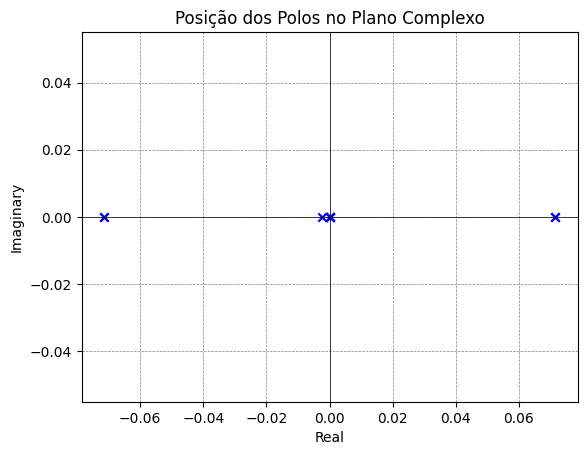

In [55]:
# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## O Critério de Routh-Hurwitz

In [56]:
# Calcula o polinômio característico
char_poly = sy.Poly(np.poly(A), s)
char_poly

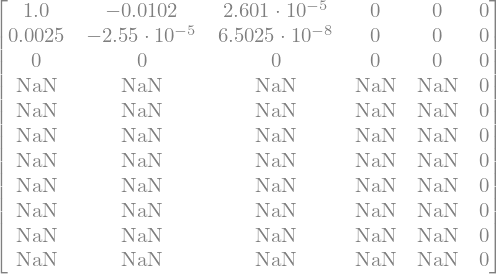

In [57]:
rhm = routh(char_poly)
rhm